# CIFAR-10 Multiple Classes

In [1]:
import pandas as pd
import numpy as np

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 118s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

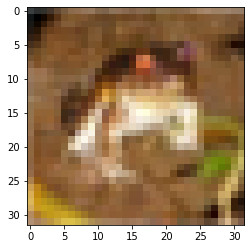

In [6]:
plt.imshow(x_train[0])

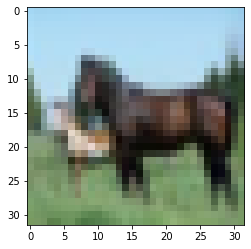

In [7]:
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5183 - accuracy: 0.4554 - val_loss: 1.3709 - val_accuracy: 0.5211
Epoch 2/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1638 - accuracy: 0.5925 - val_loss: 1.1358 - val_accuracy: 0.6010
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0101 - accuracy: 0.6530 - val_loss: 1.0126 - val_accuracy: 0.6448
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9049 - accuracy: 0.6903 - val_loss: 1.3054 - val_accuracy: 0.5736
Epoch 5/15
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8264 - accuracy: 0.7179 - val_loss: 0.9483 - val_accuracy: 0.6802
Epoch 6/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7671 - accuracy: 0.7393 - val_loss: 1.0647 - val_accuracy: 0.6556
Epoch 7/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7147 - accuracy: 0.7582 - val_loss: 1.0615 -

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.518270,0.45538,1.370909,0.5211
1,1.163835,0.59248,1.135839,0.6010
2,1.010108,0.65304,1.012630,0.6448
3,0.904884,0.69026,1.305379,0.5736
4,0.826427,0.71788,0.948313,0.6802


<AxesSubplot:>

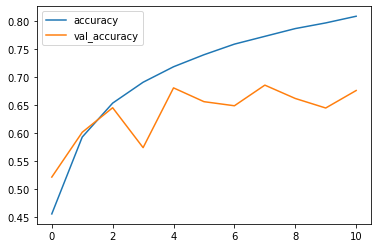

In [30]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

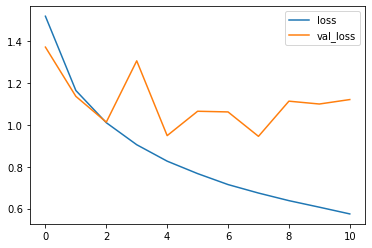

In [31]:
losses[['loss','val_loss']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1205309629440308, 0.6754999756813049]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1000
           1       0.79      0.83      0.81      1000
           2       0.59      0.58      0.58      1000
           3       0.48      0.54      0.51      1000
           4       0.56      0.71      0.63      1000
           5       0.65      0.47      0.55      1000
           6       0.86      0.67      0.75      1000
           7       0.62      0.83      0.71      1000
           8       0.75      0.80      0.78      1000
           9       0.83      0.71      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [36]:
confusion_matrix(y_test,predictions)

array([[610,  24,  72,  37,  69,   6,   1,  31, 125,  25],
       [ 16, 827,   9,  19,  11,   5,  10,  14,  27,  62],
       [ 41,   8, 577,  66, 116,  51,  32,  81,  21,   7],
       [ 14,  14,  67, 542, 101, 109,  30,  97,  16,  10],
       [ 16,   7,  72,  61, 708,  25,  12,  81,  15,   3],
       [  7,   9,  58, 214,  65, 472,  14, 150,   5,   6],
       [  5,   8,  67, 104,  97,  19, 670,  20,   8,   2],
       [ 13,   4,  16,  32,  67,  19,   2, 835,   7,   5],
       [ 49,  40,  22,  22,  18,  12,   1,   9, 803,  24],
       [ 19, 106,  19,  33,  10,   7,  11,  39,  45, 711]], dtype=int64)

<AxesSubplot:>

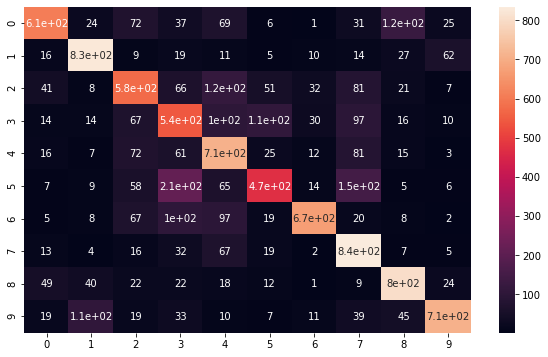

In [37]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [38]:
my_image = x_test[16]

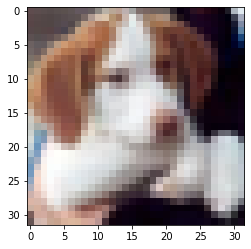

In [39]:
plt.imshow(my_image)

In [40]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [41]:
# 5 is DOG